# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

    bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
    bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
    bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
    bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

- bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
-  related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

-  other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
-  social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

- Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


# Starting from Scratch

Tidak ada template untuk assignment kali ini, jadi kalian harus memulai dari awal. Kamu dapat membuat file jupyter notebook kamu sendiri dan upload ke github ketika selesai.

# Project Instructions & Rubric
## How will this project be evaluated

Proyek kamu akan dinilai oleh Hacktiv8 PTP Program Code Reviewer berdasarkan rubrik. Pastikan untuk me-review proyek kamu terlebih dahulu sebelum submit. Semua kriteria harus terpenuhi untuk mendapatkan nilai.

Rubrik menjadi sumber utama ketika mengembangkan proyek. Bookmark halaman rubrik sehingga lebih mudah diakses!
Submission Instructions

Jika kamu memilih untuk mengembangkan proyek kamu dengan komputer pribadi, kamu perlu meng-upload file kamu ke github.
Projects Instructions

Tidak ada template untuk assignment kali ini, jadi kamu perlu mengikuti tahap-tahap berikut ini:

    Download Dataset yang di perlukan dari repositori di sini, lalu save ke folder /dataset.
    Buat sebuah Notebook baru, lalu rename file menjadi “PYTN_Assign_3_<batch_number>_<nama>".
    Bersihkan dan preproses Dataset kamu.
    Bangun model menggunakan Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, dan Random Forest.
    Pilih 1 algoritma yang kamu anggap paling sesuai lalu jelaskan mengapa.
    Kumpulkan informasi melalui analisis kamu.

Penting!

Push assignment yang telah kalian buat ke dalam akun github kalian masing-masing.

Buat sebuah file .txt dengan notepad atau code editor pilihan kalian dan masukan link repository assignment kalian dalam file .txt tersebut. Unggah file .txt tersebut pada Google Classroom.

Submission Assignment valid jika link repository assignment kalian dapat diakses untuk kemudian dinilai oleh Hacktiv8 PTP Program Code Reviewer.

## Projects Rubric

## Code Review
Criteria	Meet Expectations
1. Logistic Regression	Mengimplementasikan Logistic Regression Dengan Scikit-Learn
2. K-Nearest Neighbors	Mengimplementasikan K-Nearest Neighbors Dengan Scikit-Learn
3. Support Vector Machine	Mengimplementasikan Support Vector Machine Dengan Scikit-Learn
4. Decision Tree	Mengimplementasikan Decision Tree Dengan Scikit-Learn
5. Random Forest	Mengimplementasikan Random Forest Dengan Scikit-Learn
6. Naive Bayes	Mengimplementasikan Naive Bayes Dengan Scikit-Learn
7. Confusion Matrix	Mengimpelentasikan Confusion Matrix Regression Dengan Scikit-Learn
8. Visualization	Menganalisa Data Menggunakan Setidaknya 2 Tipe Grafik/Plot.
9. Preprocessing	Melakukan Preproses Dataset Sebelum Melakukan Penelitian Lebih Dalam.
10. Apakah Kode Berjalan Tanpa Ada Eror?	Kode Berjalan Tanpa Ada Eror. Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.

## Readibility
Criteria	Meet Expectations
Tertata Dengan Baik	Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode.

Analysis
Criteria	Meet Expectations
Algorithm Analysis	Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.

In [1]:
## load libraries

# !conda install pydotplus -y

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import sklearn.tree as tree
from IPython.display import Image
from six import StringIO
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
## load data

df = pd.read_csv('./dataset/bank.csv', sep=';')
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


Text(0.5, 1.0, 'Target label proportion')

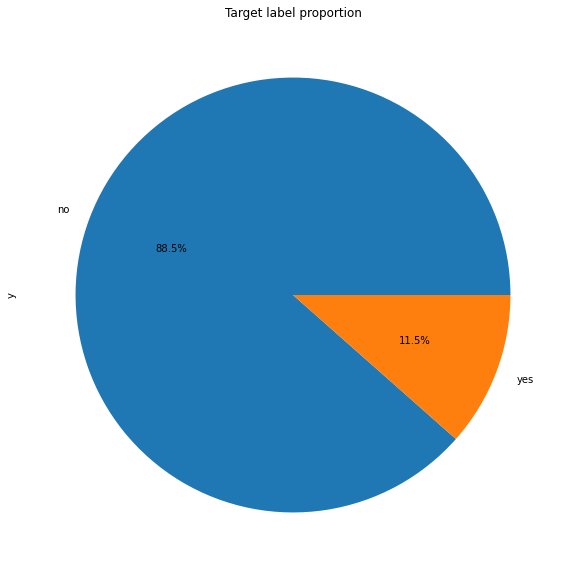

In [3]:
print(df.info())

df['y'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10,10)
)
plt.title("Target label proportion")

In [4]:
print("shape : ", df.shape)
list(df.columns)

shape :  (4521, 17)


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [5]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [6]:
# Convert Categorical to Numeric
categorical = df.loc[:, df.dtypes == object]
numerical = df.loc[:, df.dtypes != object]

categorical = categorical.copy()
le = preprocessing.LabelEncoder()

for i in categorical:
    str_i = str(i)
    categorical[str_i] = le.fit_transform(categorical[str_i])

df_cleansed = pd.concat([numerical, categorical], axis=1)
print('cleansed data head\n', df_cleansed.head())
print('........................................')
print('cleansed data info\n', df_cleansed.info())
print('........................................')
print('cleansed data description\n', df_cleansed.describe())

cleansed data head
    age  balance  day  duration  campaign  pdays  previous  job  marital  \
0   30     1787   19        79         1     -1         0   10        1   
1   33     4789   11       220         1    339         4    7        1   
2   35     1350   16       185         1    330         1    4        2   
3   30     1476    3       199         4     -1         0    4        1   
4   59        0    5       226         1     -1         0    1        1   

   education  default  housing  loan  contact  month  poutcome  y  
0          0        0        0     0        0     10         3  0  
1          1        0        1     1        0      8         0  0  
2          2        0        1     0        0      0         0  0  
3          2        0        1     1        2      6         3  0  
4          1        0        1     0        2      8         3  0  
........................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data c

In [7]:
df_cleansed.head()

age  balance  day  duration  campaign  pdays  previous  job  marital  \
0   30     1787   19        79         1     -1         0   10        1   
1   33     4789   11       220         1    339         4    7        1   
2   35     1350   16       185         1    330         1    4        2   
3   30     1476    3       199         4     -1         0    4        1   
4   59        0    5       226         1     -1         0    1        1   

   education  default  housing  loan  contact  month  poutcome  y  
0          0        0        0     0        0     10         3  0  
1          1        0        1     1        0      8         0  0  
2          2        0        1     0        0      0         0  0  
3          2        0        1     1        2      6         3  0  
4          1        0        1     0        2      8         3  0

In [8]:
df_cleansed.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous          job      marital    education  \
count  4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean     39.766645     0.542579     4.411192     1.147755     1.231365   
std     100.121124     1.693562     3.255716     0.599650     0.748744   
min      -1.000000     0.000000     0.000000     0.000000     0.000000   
25%      -1.000000     0.000000     1.000000     1.000000     1.000000   
50%      -1.000000     0.000000     4.000000     1.000000     1.000000   
75%      -1.000000     0.000000     7.000000     2.000000     2.000000   
max     871.000000    25.000000    11.000000     2.000000     3.000000   

           default      housing         loan      contact        month  \
count  4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean      0.016810     0.566025     0.152842     0.652289     5.540146   
std       0.128575     0.495676     0.359875     0.901498     3.002763   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     3.000000   
50%       0.000000     1.000000     0.000000     0.000000     6.000000   
75%       0.000000     1.000000     0.000000     2.000000     8.000000   
max       1.000000     1.000000     1.000000     2.000000    11.000000   

          poutcome            y  
count  4521.000000  4521.000000  
mean      2.559168     0.115240  
std       0.992051     0.319347  
min       0.000000     0.000000  
25%       3.000000     0.000000  
50%       3.000000     0.000000  
75%       3.000000     0.000000  
max       3.000000     1.000000

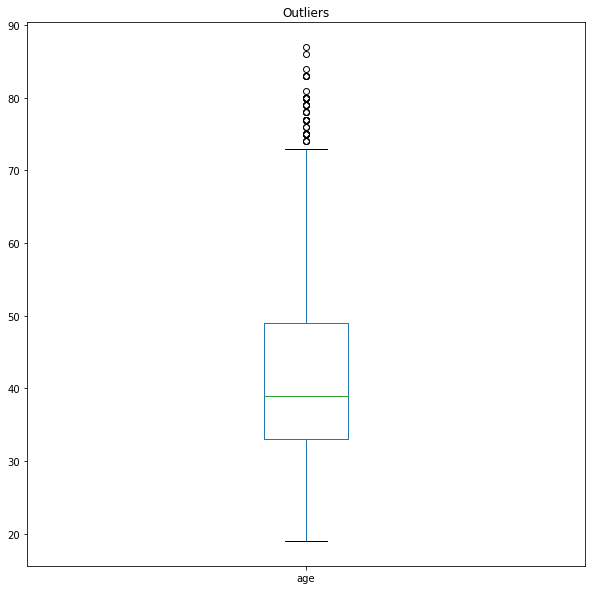

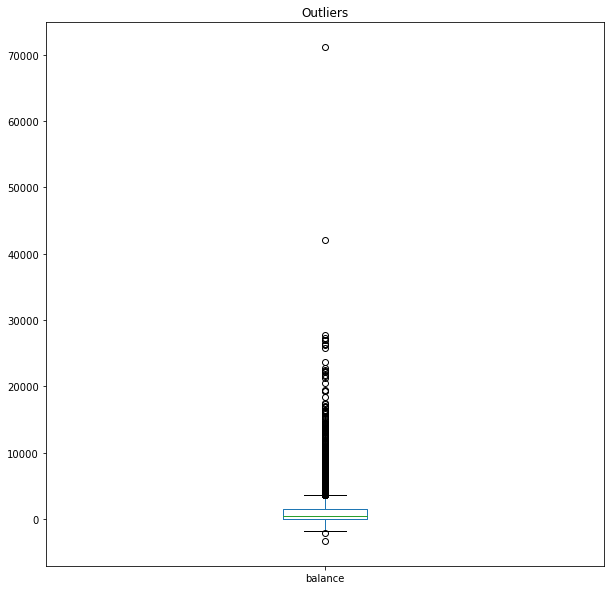

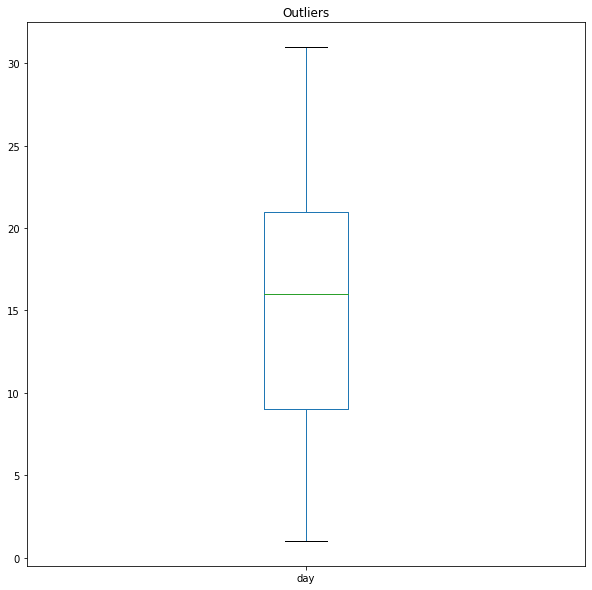

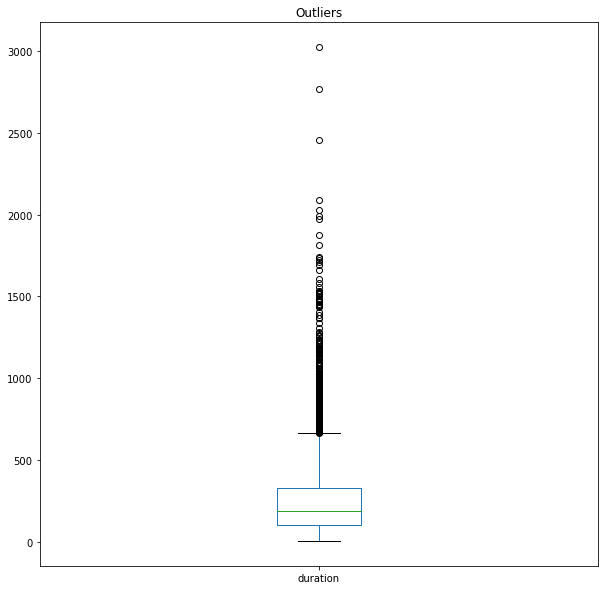

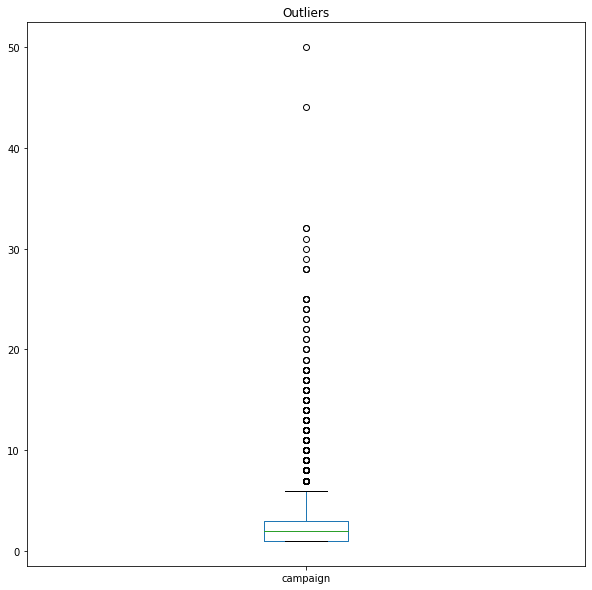

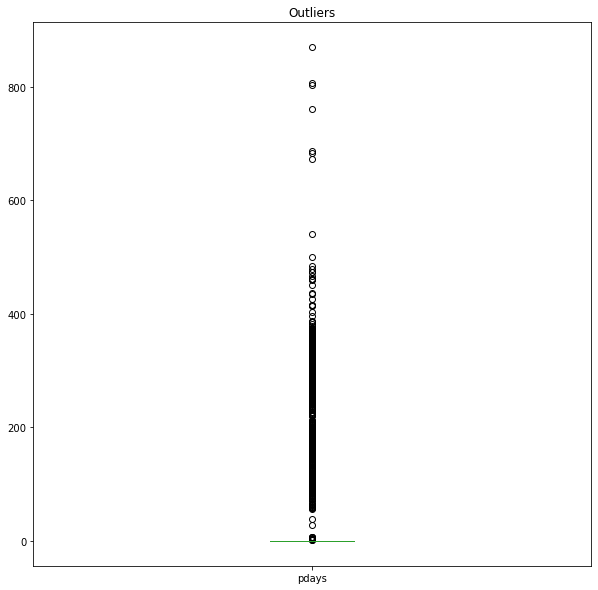

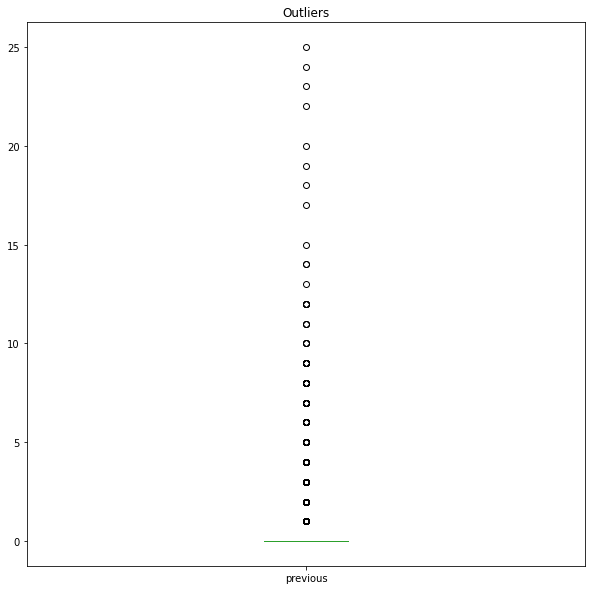

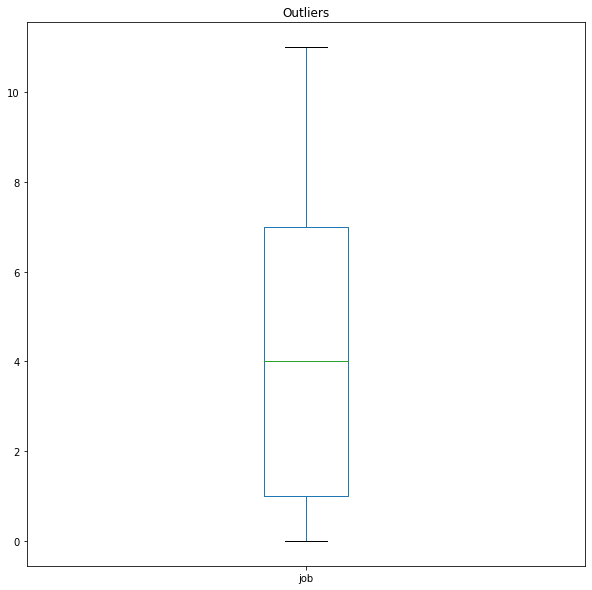

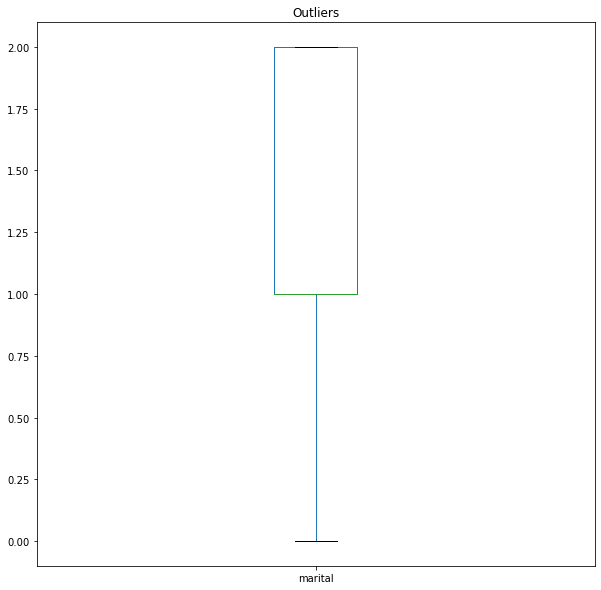

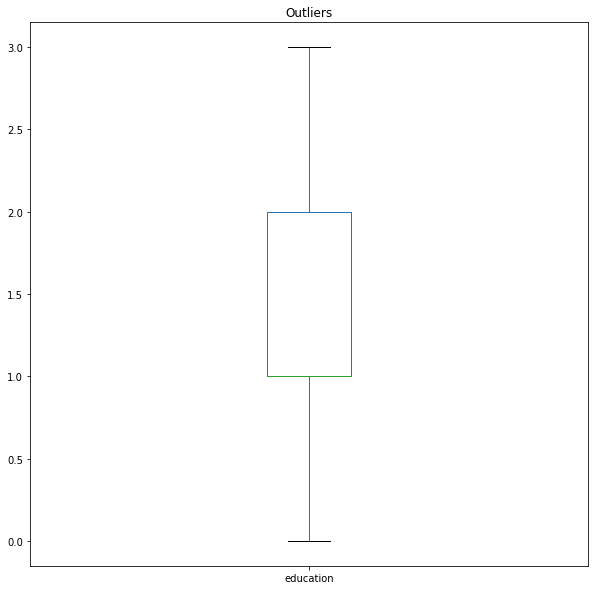

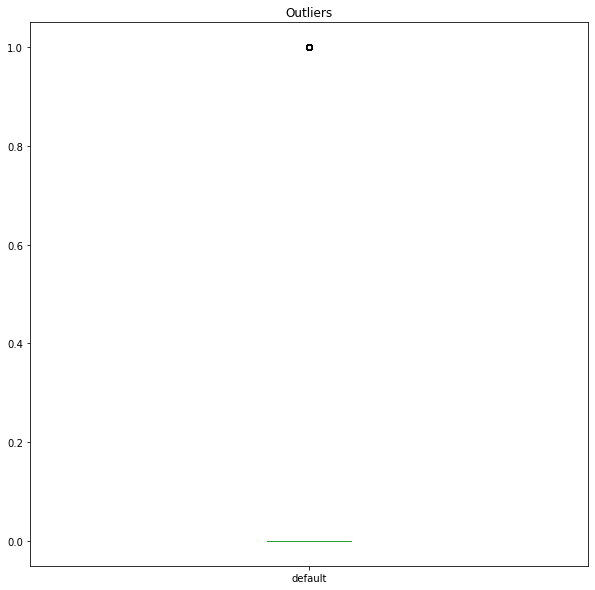

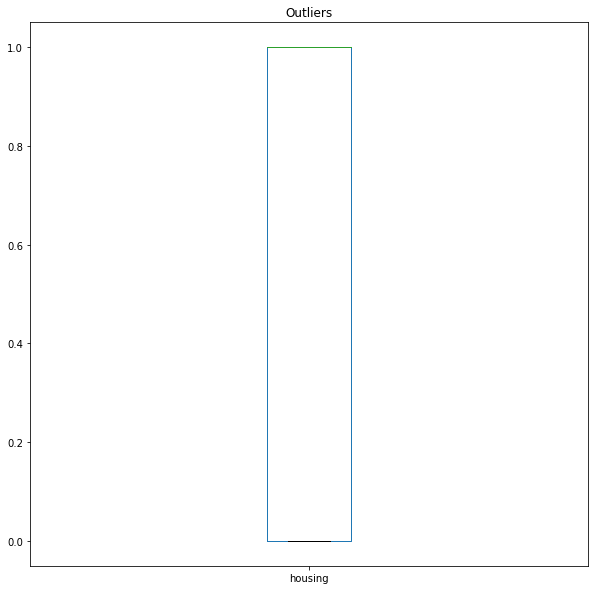

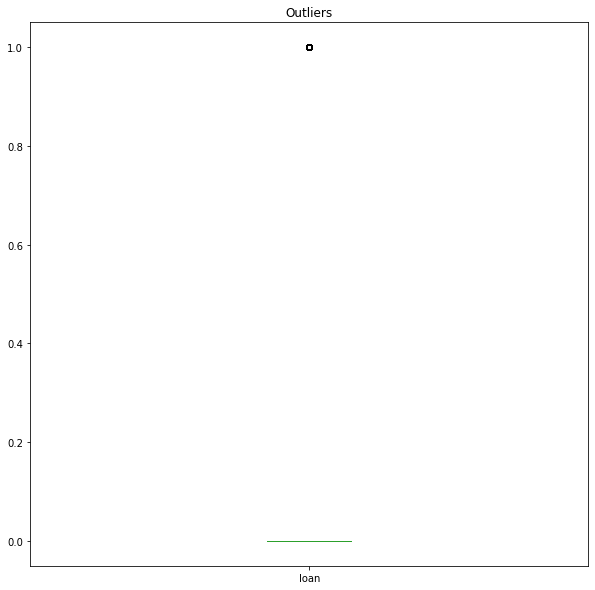

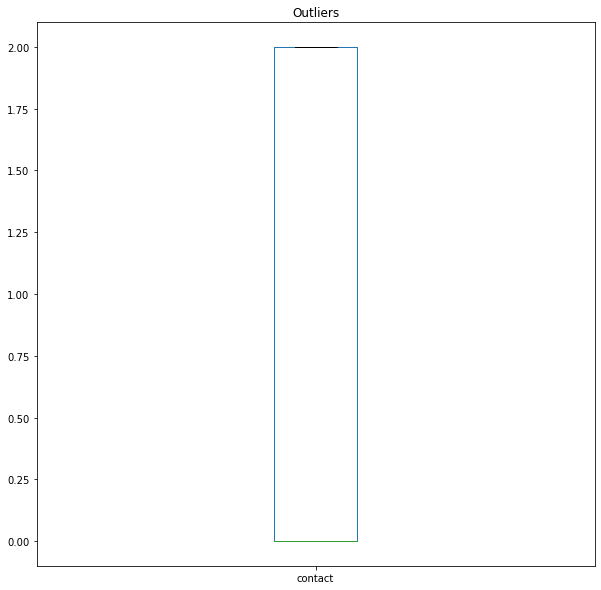

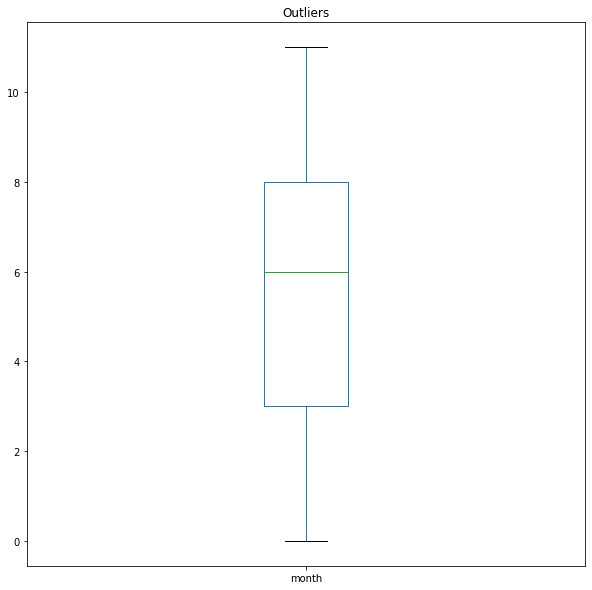

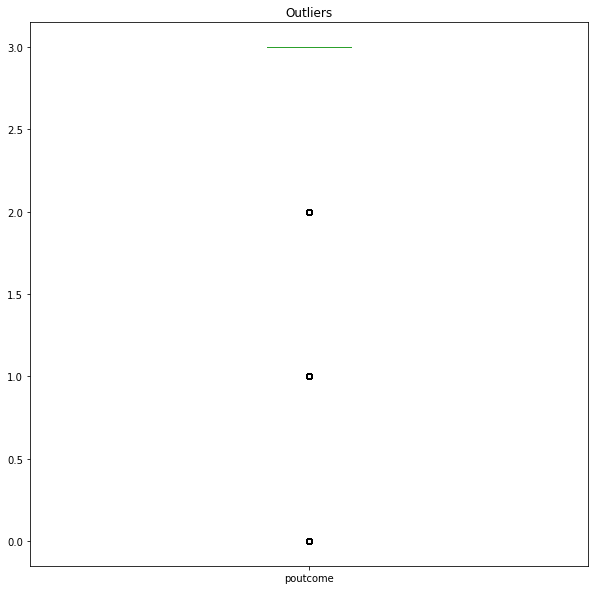

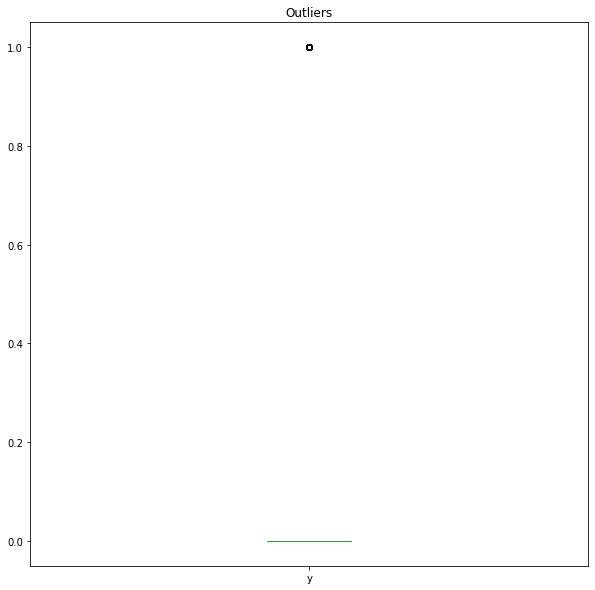

In [9]:
# Outliers
for i in df_cleansed:
    str_i = str(i)
    df_cleansed[str_i].plot(
        kind="box",
        figsize=(10,10)
    )
    plt.title("Outliers")
    plt.show()

In [10]:
# Split Dataset
x = df_cleansed.loc[:, df_cleansed.columns != 'y']
y = df_cleansed['y']
print(x.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=.2,
    random_state=11
)
print("training size:", X_train.shape[0], "\ntest size:", X_test.shape[0])

(4521, 16) (4521,)
training size: 3616 
test size: 905


In [11]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)

    print(" ==== training performance ==== \n accuracy score:", train_acc,
          "\n ==== test performance ==== \n accuracy score:", test_acc,
          "\n ", classification_report(y_test, test_pred),
          "\n ", confusion_matrix(y_test, test_pred))

In [12]:
print("Logistic Regression Model")
logistic = LogisticRegression()

train_model(logistic, X_train, X_test, y_train, y_test)

Logistic Regression Model
 ==== training performance ==== 
 accuracy score: 0.8841261061946902 
 ==== test performance ==== 
 accuracy score: 0.8983425414364641 
                precision    recall  f1-score   support

           0       0.91      0.99      0.95       809
           1       0.59      0.14      0.22        96

    accuracy                           0.90       905
   macro avg       0.75      0.56      0.58       905
weighted avg       0.87      0.90      0.87       905
 
  [[800   9]
 [ 83  13]]


/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print("K-nearest neighbors Model")
knn = KNeighborsClassifier()

train_model(knn, X_train, X_test, y_train, y_test)

K-nearest neighbors Model
 ==== training performance ==== 
 accuracy score: 0.9021017699115044 
 ==== test performance ==== 
 accuracy score: 0.8795580110497238 
                precision    recall  f1-score   support

           0       0.91      0.96      0.93       809
           1       0.37      0.20      0.26        96

    accuracy                           0.88       905
   macro avg       0.64      0.58      0.60       905
weighted avg       0.85      0.88      0.86       905
 
  [[777  32]
 [ 77  19]]


In [14]:
print("Support-vector machine Model")

svm = SVC()

train_model(svm, X_train, X_test, y_train, y_test)

Support-vector machine Model
 ==== training performance ==== 
 accuracy score: 0.8824668141592921 
 ==== test performance ==== 
 accuracy score: 0.8939226519337017 
                precision    recall  f1-score   support

           0       0.89      1.00      0.94       809
           1       0.00      0.00      0.00        96

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905
 
  [[809   0]
 [ 96   0]]


/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print("Decision tree Model")
dst = DecisionTreeClassifier()

train_model(dst, X_train, X_test, y_train, y_test)

def visualize_tree(clf, class_name):
    dot_data = StringIO()
    tree.export_graphviz(
        clf,
        out_file=dot_data,
        class_names=class_name,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

graph = visualize_tree(dst, ["0", "1"])
Image(graph.create_png())

Decision tree Model
 ==== training performance ==== 
 accuracy score: 1.0 
 ==== test performance ==== 
 accuracy score: 0.8784530386740331 
                precision    recall  f1-score   support

           0       0.93      0.93      0.93       809
           1       0.43      0.45      0.44        96

    accuracy                           0.88       905
   macro avg       0.68      0.69      0.69       905
weighted avg       0.88      0.88      0.88       905
 
  [[752  57]
 [ 53  43]]


In [16]:
print("Random Forest Model")

randfor = RandomForestClassifier()

train_model(randfor, X_train, X_test, y_train, y_test)

Random Forest Model
 ==== training performance ==== 
 accuracy score: 1.0 
 ==== test performance ==== 
 accuracy score: 0.901657458563536 
                precision    recall  f1-score   support

           0       0.92      0.97      0.95       809
           1       0.57      0.29      0.39        96

    accuracy                           0.90       905
   macro avg       0.75      0.63      0.67       905
weighted avg       0.88      0.90      0.89       905
 
  [[788  21]
 [ 68  28]]


In [17]:
print("Naive Bayesian Model")

bayes = GaussianNB()

train_model(bayes, X_train, X_test, y_train, y_test)

Naive Bayesian Model
 ==== training performance ==== 
 accuracy score: 0.8382190265486725 
 ==== test performance ==== 
 accuracy score: 0.8408839779005525 
                precision    recall  f1-score   support

           0       0.93      0.89      0.91       809
           1       0.32      0.43      0.36        96

    accuracy                           0.84       905
   macro avg       0.62      0.66      0.64       905
weighted avg       0.86      0.84      0.85       905
 
  [[720  89]
 [ 55  41]]


# Analisis


Berdasarkan training dengan beberapa model yang telah dilakukan, didapatkan:


Logistic Regression Accuracy = 0.8983425414364641

KNN Accuracy = 0.8795580110497238

SVM Accuracy = 0.8939226519337017 

Decision Tree Accuracy = 0.8806629834254144

Random Forest Accuracy = 0.8939226519337017

Naive Bayes Accuracy = 0.8408839779005525


Berdasarkan hasil di atas, classifier terbaik untuk case ini adalah Logistic Regression.